# Analysis of lines spoken by main characters by season

We'll use regex to parse the Simpsons database of episodes and scripts to look at how the dialogue varies for the main characters by episode and season.

In [2]:
# imports
import bs4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import urllib
import time
sns.set()
%matplotlib inline
import psycopg2
from sqlalchemy import create_engine

## Connect to PostgreSQL database of Simpsons scripts

In [3]:
# connect to postgresl
dbname = 'simpsonsscripts'
username = 'hsf001'

con = None
con = psycopg2.connect(database = dbname, user = username)

engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://hsf001@localhost/simpsonsscripts


## Pull script from 1 episode and sort by character

We'll get the script for 1 episode and count how many lines are attributed to each of the main characters (Homer Simpson, Marge Simpson, Bart Simpson, and Lisa Simpson).

In [13]:
# SQL query for script from one episode: Season 5, Episode 5

sql_query = """
SELECT ep.season, ep.number, ep.name, scripts.text FROM episodes ep  
  LEFT JOIN scripts ON ep.url = scripts.url WHERE ep.season='5' AND ep.number='5'
"""
output_from_sql = pd.read_sql_query(sql_query,con)
output_from_sql.head()

,season,number,name,text
0,5,5,Treehouse of Horror IV,"Richard Nixon: Yes, Master."
1,5,5,Treehouse of Horror IV,(NIGHT GALLERY-TYPE SET: int. night gallery-ty...
2,5,5,Treehouse of Horror IV,Bart Simpson: Paintings. Lifeless images rend...
3,5,5,Treehouse of Horror IV,Bart Simpson: They become portals to hell so ...
4,5,5,Treehouse of Horror IV,Marge Simpson: Bart! You should warn people t...


In [21]:
sql_query = """
SELECT ep.number, COUNT(*) FROM episodes ep  
  LEFT JOIN scripts ON ep.url = scripts.url WHERE ep.season='5'
  AND scripts.text LIKE 'Homer Simpson: %'
  GROUP BY ep.number
  ORDER BY ep.number
"""

output_from_sql = pd.read_sql_query(sql_query,con)
output_from_sql

# 

,number,count
0,1,63
1,10,56
2,11,77
3,12,27
4,13,57
5,14,17
6,15,51
7,16,88
8,17,81
9,18,35


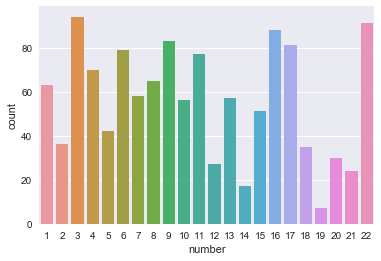

In [26]:
# make episode number integer
output_from_sql['number']=output_from_sql['number'].astype(int)

# view sorted output
output_from_sql.sort_values(by='number')

# plot number of Homer's lines by episode for Season 5
sns.barplot(x='number', y='count', data=output_from_sql)


In [ ]:
# read output_from_sql, text column, write regular expression to extract 'Homer Simpson: ', count number of occurences

# same for 'Marge Simpson: '

# same for 'Bart Simpson: '

# same for 'Lisa Simpson: '

for line in output_from_sql:
    
    
# apply function to column to count 0 or 1

### Start with 1 season

### Focus on first 15 seasons